In [71]:
# 0
results = []
sentence = []

with open("neko.txt.mecab", "r") as f:
    for line in f.readlines():
        if line != "EOS\n":
            line = line.split("\t")
            if len(line) != 2 or line[0] == "":
                continue
            attr = line[1].split(",")
            word = {"surface": line[0], "base": attr[6], "pos": attr[0], "pos1": attr[2]}
            sentence.append(word)
        else:
            if len(sentence) != 0:
                results.append(sentence)
                sentence = []

In [63]:
# 1
ans = set()

for result in results:
    for word in result:
        if word["pos"] == "動詞":
            ans.add(word["surface"])

print(len(ans))
for i in list(ans)[:5]:
    print(i)

3893
踊ら
巡っ
奪い合っ
躍り出
通れ


In [64]:
# 2
ans = set()

for result in results:
    for word in result:
        if word["pos"] == "動詞":
            ans.add(word["base"])

print(len(ans))
for i in list(ans)[:5]:
    print(i)

2300
かう
遺す
休める
抱え込む
罹る


In [73]:
# 3
ans = set()

for result in results:
    for i in range(1, len(result) - 1):
        if result[i-1]["pos"] == "名詞" and result[i]["surface"] == "の" and result[i+1]["pos"] == "名詞":
            ans.add(result[i-1]["surface"] + result[i]["surface"] + result[i+1]["surface"])

print(len(ans))
for i in list(ans)[:5]:
    print(i)

4924
弁護の労
枯菊の茂み
吾輩の事
吾輩の手
当家の令嬢


In [74]:
# 4
ans = set()

for result in results:
    count = 0
    sentence = ""
    for word in result:
        if word["pos"] == "名詞":
            sentence += word["surface"]
            count += 1
        elif count >= 2:
            ans.add(sentence)
            count = 0
            sentence = ""
        else:
            count = 0
            sentence = ""
    if count >= 2:
        ans.add(sentence)

print(len(ans))
for i in list(ans)[:5]:
    print(i)

4457
二匹
系統内
三面攻撃
毛中
古井武右衛門


In [83]:
# 5
from collections import defaultdict

ans = defaultdict(int)
for result in results:
    for word in result:
        if word["pos"] != "記号":
            ans[word["surface"]] += 1

ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)
print(len(ans))
for i in ans[:5]:
    print(i)

13559
('の', 9194)
('て', 6868)
('は', 6420)
('に', 6243)
('を', 6071)


<BarContainer object of 10 artists>

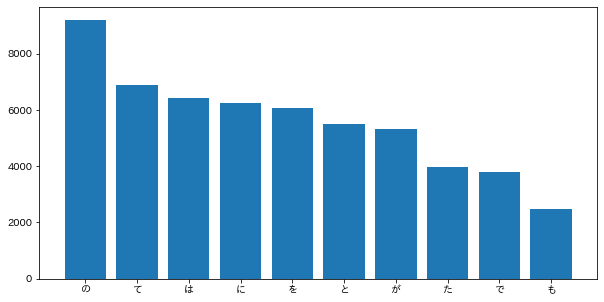

In [87]:
# 6
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

ans = defaultdict(int)
for result in results:
    for word in result:
        if word["pos"] != "記号":
            ans[word["surface"]] += 1

ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)
x = [x[0] for x in ans[:10]]
y = [x[1] for x in ans[:10]]

plt.figure(figsize=(10, 5))
plt.bar(x, y)

<BarContainer object of 10 artists>

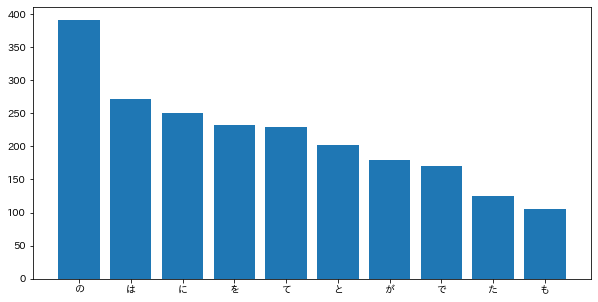

In [89]:
# 7
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

ans = defaultdict(int)
for result in results:
    if "猫" in [word["surface"] for word in result]:
        for word in result:
            if word["pos"] != "記号":
                ans[word["surface"]] += 1

ans.pop("猫")
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)
x = [x[0] for x in ans[:10]]
y = [x[1] for x in ans[:10]]

plt.figure(figsize=(10, 5))
plt.bar(x, y)

Text(0, 0.5, '単語種類数')

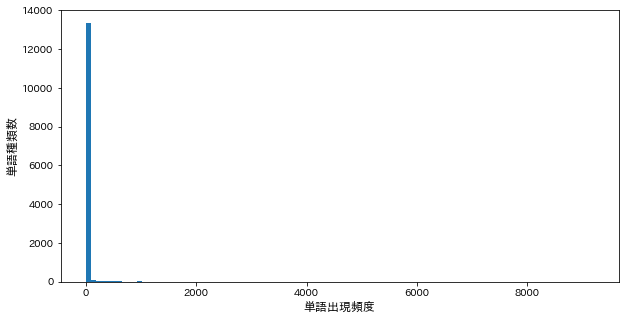

In [97]:
# 8
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

ans = defaultdict(int)
for result in results:
    for word in result:
        if word["pos"] != "記号":
            ans[word["surface"]] += 1

plt.figure(figsize=(10, 5))
plt.hist(ans.values(), bins=100)
plt.xlabel("単語出現頻度", fontsize=12)
plt.ylabel("単語種類数", fontsize=12)

Text(0, 0.5, '単語出現頻度')

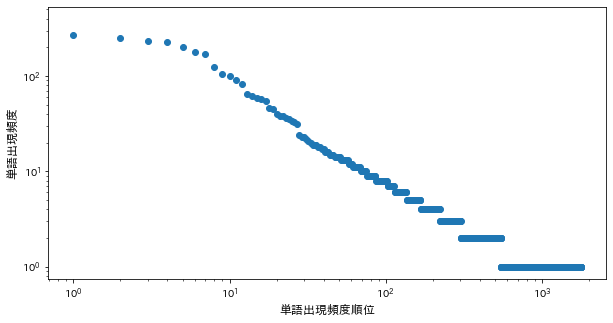

In [100]:
# 9
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

ans = defaultdict(int)
for result in results:
    if "猫" in [word["surface"] for word in result]:
        for word in result:
            if word["pos"] != "記号":
                ans[word["surface"]] += 1

ans.pop("猫")
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)
x = [i for i, _ in enumerate(ans)]
y = [x[1] for x in ans]

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("単語出現頻度順位", fontsize=12)
plt.ylabel("単語出現頻度", fontsize=12)